# Connect Intensive - Machine Learning Nanodegree

## Week 4. Neural Nets Mini-project

### Objectives    

- Understand the fundamentals of neural networks  
- Build simple perceptrons 
- Train a perceptron model with `scikit-learn` (Optional)

### Prerequisites   

 - You should have [numpy](http://www.scipy.org/scipylib/download.html) and [scikit-learn](http://scikit-learn.org) installed  
 - You should have some understanding of [Python classes and objects](https://docs.python.org/3/tutorial/classes.html). If you are not familar with these, here is an interactive [tutorial](https://www.learnpython.org/en/Classes_and_Objects).  

---

## Part I. Introduction to Neural Networks

An ["Artificial" Neural Network (ANN)](https://en.wikipedia.org/wiki/Artificial_neural_network) is a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs. It is inspired by the way biological neural networks in the human brain. ANNs have generated a lot of excitement in the Machine Learning research and industry with great breakthroughs in the areas of speech recognition, computer vision, and natural language processing.  

Neural neworks are typically organized in layers. Layers are made up of a number of interconnected **"nodes"** which contain an **"activation function"**. Patterns are presented to the network via the **"input layer"**, which passes through one or more **"hidden layers"** to be processed. The hidden layers then connects to an **"output layer"** to give the outputs. The image below shows the first and the simplest neural network, the so-called [feedforward neural network](https://en.wikipedia.org/wiki/Feedforward_neural_network), wherein connections between the units do not form a cycle.  

![NN](./img/NN.png)

### Node (Single Neuron)   
The basic unit in a neural network is the neuron, often called a "node" or "unit". It receives input from some other nodes, or from an external source and computes the output. Each input has an associated *weight (w)*, which is assigned based on its relative importance to other inputs. The node applies a non-linear activation function to the weighted sum of its inputs, as follows, $$f(w_1*x_1 + w_2*x_2 + b)$$. 


### Activation Function 
The activation function takes a single number input and performs a certain mathematical operation. Some commonly used activation functions include:  

- [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function): taks a real-value input and gives a characteristic "S"-shaped curve with returned values between 0 and 1  
- Tanh: takes a real-valued input and gives output in the range [-1, 1] 
- [ReLu (**RE**ctified **L**inear **U**nit)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)): takes a real-valued input and thresholds it at zero (replaces negative values with zero).   


### Perceptron  
[Perceptron](https://en.wikipedia.org/wiki/Perceptron) was invented in the 1950s and was one of the first artificial neural networks to be produced. 

- **Single Layer Perceptron** This is the simplest feedforward neural network and does not contain any hidden layer.  

- **Multi Layer Perceptron** A Multi Layer Perceptron has one or more hidden layers. It is more useful than Single Layer Perceptons in terms of practical applications.

In this notebook, we will be building both a Single Layer Percepton and a Multi Layer Percepton. 

---

## Part II. Implementation

### 1. Single Layer Perceptron  

Note that a simple Single Layer Perceptron maps a series of inputs to an output. Each input is assigned a cetrain weight and then some mapping is applied to determines the output of the perceptron.   

![single layer](./img/SL_perceptron.png)

#### Build a simple perceptron  
We will compute the weights of the inputs by taking the dot product of the input vector and the weight vector. This number is also known as the strenth or the activity of the inputs. We will use a simple step function to map to the perceptron output. The step function takes in the strenth of the inputs and we will compare the strength to some predefined threshold value.

In [1]:
# ----------
# 
# In this exercise, you will add in code that decides whether a perceptron will fire based
# on the threshold.  
#
# ----------
import numpy as np

class Perceptron0(object):
    """
    This class models an artificial neuron with step activation function.
    """
    def __init__(self, weights = np.array([1]), threshold = 0):
        """
        Initialize weights and threshold based on input arguments. Note that no
        type-checking is being performed here for simplicity.
        """
        self.weights = weights
        self.threshold = threshold
    
    def activate(self, inputs):
        """
        Takes in 
        @param inputs, a list of numbers equal to length of weights.
        @return the output of a threshold perceptron with given inputs based on
        perceptron weights and threshold.
        """ 
        # TODO: calculate the strength with which the perceptron fires.
        strength = np.dot(inputs, self.weights)
        
        # TODO: return 0 or 1 based on the threshold
        if strength > self.threshold:
            return 1
        else:
            return 0

def test():
    """
    A few tests to make sure that the perceptron class performs as expected.
    Nothing should show up in the output if all the assertions pass.
    """
    p1 = Perceptron0(np.array([1, 2]), 0.)
    assert p1.activate(np.array([ 1, -1])) == 0 # <threshold -> 0
    assert p1.activate(np.array([-1,  1])) == 1 # >threshold -> 1
    assert p1.activate(np.array([ 2, -1])) == 0 # =threshold -> 0
    

if __name__ == "__main__":
    test()

#### QUESTIONS: 


- What are the advantages of using some threshold and step function rather than just outputting the weighted inputs (dot product)?  
> **Answer:** The main advantage of having a threshold be set to a perceptron is being able to control when a perceptron should fire and when it shouldn't. This gives us control on the sensitivity of our neurons thereby helping us influence the desired output. For example, it creates discrete outputs needed for classification and it also allows us to move the position of the decision boundry.  



- What parameter is learnable in a perceptron, i.e., what can be modified to allow the perceptron to model an arbitrary function?   
> **Answer:** We can modify the thresholds, or we could also include threshold changes in the weights.    


- What does the input to a network of perceptrons look like? 

    A) Tensor of weights  
    B) Matrix of numerical values  
    C) Matrix of classifcations  
    D) Matrix of numerical values and classifications for each row.    
> **Answer:** D). A single perceptron is very much like linear regression. Therefore it should take the same kind of inputs. However, the outputs of perceptrons will generally be classifications, not numerical. 


- Are Neural Networks used for classification or regression?   
> **Answer:** Neural networks can be used both for classification or regression. 


#### Perceptron update rule 

The update rule for perceptron is as follows:  

$$ w(t + 1) = w(t) + (\eta * (y_i - \hat{y_i}(t)) * x_i $$


In [2]:
# ----------
#
# In this exercise, you will update the perceptron class so that it can update
# its weights.
#
# Finish writing the update() method so that it updates the weights according
# to the perceptron update rule. Updates should be performed online, revising
# the weights after each data point.
# 
# ----------


class Perceptron1(Perceptron0):
    """
    This class models an artificial neuron with step activation function.
    """

    def __init__(self, *args):
        """
        Initialize weights and threshold based on input arguments. Note that no
        type-checking is being performed here for simplicity.
        """
        super(Perceptron1, self).__init__(*args)


    def update(self, X, y, eta=.1):
        """
        Takes in 
        @param X, a 2D array consisting of a LIST of inputs and 
        @param y, a 1D array consisting of a corresponding list of expected
        outputs. Updates internal weights according to the perceptron training
        rule using these values and 
        @param eta, an optional learning rate.
        """

        # YOUR CODE HERE
        # TODO: for each data point...
        for i, x_i in enumerate(X):
            
            # TODO: obtain the prediction for that point
            y_hat = self.activate(x_i)

            # TODO: update self.weights based on prediction accuracy, learning
            delta_w = (eta * (y[i] - y_hat)) * x_i
            self.weights = self.weights + delta_w
            
def test():
    """
    A few tests to make sure that the perceptron class performs as expected.
    Nothing should show up in the output if all the assertions pass.
    """
    def sum_almost_equal(array1, array2, tol = 1e-6):
        return sum(abs(array1 - array2)) < tol

    p1 = Perceptron1(np.array([1, 1, 1]), 0)
    p1.update(np.array([[2, 0, -3]]), np.array([1]))
    assert sum_almost_equal(p1.weights, np.array([1.2, 1, 0.7]))

    p2 = Perceptron1(np.array([1, 2, 3]), 0)
    p2.update(np.array([[3, 2, 1], [4, 0, -1]]), np.array([0, 0]))
    assert sum_almost_equal(p2.weights, np.array([0.7, 1.8, 2.9]))

    p3 = Perceptron1(np.array([3, 0, 2]),0)
    p3.update(np.array([[2, -2, 4],[-1, -3, 2], [0, 2, 1]]), np.array([0, 1, 0]))
    assert sum_almost_equal(p3.weights, np.array([2.7, -0.3, 1.7]))
    return True

if __name__ == "__main__":
    test()

### 2. Multi Layer Perceptron 

The simple single node perceptron can only separate the data linearly. Multi Layer Perceptron is more useful in practice. This class of networks consists of multiple layers of computational units. Each neuron in one layer has directed connections to the neurons of the subsequent layer. In many applications the units of these networks apply a sigmoid function as an activation function.

#### QUESTION: 

Given weights for the hidden layer [1, 1, -5] and [3, -4, 2], and weights for the output layer [2, -1], what will the network output if inputs are [1, 2, 3] (as shown by the figure below)? 

**Answer:**  

![multilayer](./img/Q_multilayer.png)

#### Build an XOR network  

**The XOR (exclusive OR) problem** is a problem that can be described with the logic table below, and visualised in input space: 

![XOR](./img/XOR.png)

A two-layer neural network is capable of calculating XOR. The numbers within the neurons represent each neuron's explicit threshold (which can be factored out so that all neurons have the same threshold, usually 1). The numbers that annotate arrows represent the weight of the inputs. This net assumes that if the threshold is not reached, zero (not -1) is output.   
In this example, let's build a network capable of modeling XOR funtion. The weights and thresholds are given below.  

![Q_XOR](./img/Q_XOR.png)

In [3]:
# ----------
#
# In this exercise, you will create a network of perceptrons that can represent
# the XOR function based on the network above.
#
# You will need to create a network of perceptrons with the correct weights,
# and define a procedure EvalNetwork() which takes in a list of inputs and
# outputs the value of this network.
#
# ----------


# Step 1: Set up the perceptron network
Network = [
    # TODO: input layer, declare input layer perceptrons here
    [Perceptron0(np.array([2, -1]), 1.5), \
    Perceptron0(np.array([-1, 2]), 1.5)],
    # TODO: output node, declare output layer perceptron here
    [Perceptron0(np.array([2, 2]), 1)]
]

# Step 2: Define a procedure to compute the output of the network, given inputs
def EvalNetwork(inputValues, Network):
    """
    Takes in 
    @param inputValues, a list of input values, and 
    @param Network, specifies a perceptron network. 
    @return the output of the Network for the given set of inputs.
    """
    
    # YOUR CODE HERE
    # TODO: 
    inputValues = inputValues.tolist()
    print "\n  Inputs", inputValues
    AND = [Network[0][0].activate(inputValues), Network[0][1].activate(inputValues)]
    print "  AND activation", AND
    # inputValues.append(AND)
    print "  Inputs plus output from AND", AND
    OutputValue = Network[1][0].activate(AND)
    print "  OutputValue", OutputValue
    # Be sure your output value is a single number

def test():
    """
    A few tests to make sure that the perceptron class performs as expected.
    """
    EvalNetwork(np.array([0, 0]), Network) # 0 XOR 0 = 0 
    EvalNetwork(np.array([0, 1]), Network) # 0 XOR 1 = 1 
    EvalNetwork(np.array([1, 0]), Network) # 1 XOR 0 = 1 
    EvalNetwork(np.array([1, 1]), Network) # 1 XOR 1 = 0 
    
test()


  Inputs [0, 0]
  AND activation [0, 0]
  Inputs plus output from AND [0, 0]
  OutputValue 0

  Inputs [0, 1]
  AND activation [0, 1]
  Inputs plus output from AND [0, 1]
  OutputValue 1

  Inputs [1, 0]
  AND activation [1, 0]
  Inputs plus output from AND [1, 0]
  OutputValue 1

  Inputs [1, 1]
  AND activation [0, 0]
  Inputs plus output from AND [0, 0]
  OutputValue 0


---

## Part III. Perceptron with Scikit-Learn  

(Adapted from this [Jupyter notebook](https://codeonsunday.wordpress.com/2017/01/15/scikit-learn-perceptron-study-in-jupyter-notebook/))

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import perceptron
%matplotlib inline

In [5]:
# make up some data
data = pd.DataFrame.from_items([
    ('Mass',   [10.0, 20.0, 4.6, 2.0, 3.0, 3.0, 10.0, 15.0, 5.0]), 
    ('Length', [6.0,  5.0,  4.0, 5.0, 4.5, 6.0, 7.0,  8.0,  9.0]),
    ('Class',  [0, 0, 1, 1, 1, 0, 0, 0, 0])])
data.head()

,Mass,Length,Class
0,10.0,6.0,0
1,20.0,5.0,0
2,4.6,4.0,1
3,2.0,5.0,1
4,3.0,4.5,1


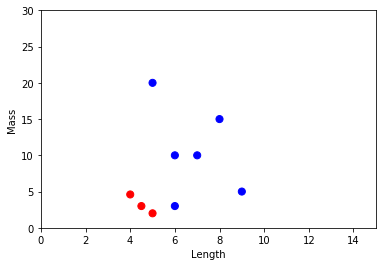

In [6]:
# TODO: plot data using Length as x-axis and Mass as y-axis 
# and use color to distinguish two classes
class_colors = np.array(['b', 'r'])
plt.scatter(x=data.Length, y=data.Mass, c=class_colors[data.Class], s=50)
plt.ylabel('Mass')
plt.xlabel('Length')
plt.ylim([0, 30])
plt.xlim([0, 15]);

In [7]:
# Create perceptron object 
p = perceptron.Perceptron(max_iter=1000, verbose=0, \
                          random_state=42, fit_intercept=True, eta0=0.001)

# Train the perceptron object 
p.fit(data[['Length', 'Mass']], data['Class'])

# Print the weights and bias
weights = p.coef_
bias = p.intercept_
print "weights = " + str(weights)
print ("bias = " + str(bias))

weights = [[-0.004  -0.0012]]
bias = [ 0.024]


In [9]:
# make prediction for new data (length 11 and mass 12)
prediction = p.predict([[11, 12]])
print prediction

[0]


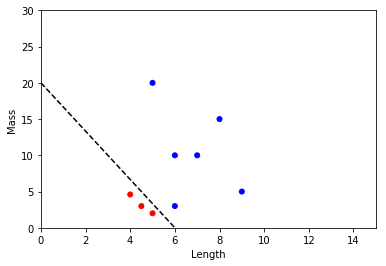

In [8]:
# TODO: plot decision boundary for the training data
# y = weights[0][0] * length + weights[0][1] * mass + bias
x_s = np.linspace(0, 15, 100) # an array of x_s
y_s = - (x_s * weights[0][0] + bias) / weights[0][1]

plt.scatter(data.Length, data.Mass, c=class_colors[data.Class], s=25)
plt.plot(x_s, y_s, 'k--') # the decision boundary
plt.ylabel('Mass')
plt.xlabel('Length')
plt.ylim([0, 30])
plt.xlim([0, 15]);